# LOAN DEFAULT PREDICTION

# DATA CLEANING & PRE-PROCESSING

# INSTALL AND IMPORT REQUIRED PACKAGES

In [1]:
!pip install numpy pandas seaborn matplotlib plotly scikit-learn imbalanced-learn xgboost category_encoders tensorflow transformers torch openai accelerate tf-keras sentencepiece pyxlsb dask pyarrow xlrd

   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/376.0 MB 2.4 MB/s eta 0:02:38
   ---------------------------------------- 1.3/376.0 MB 2.8 MB/s eta 0:02:14
   ---------------------------------------- 2.1/376.0 MB 3.2 MB/s eta 0:01:58
   ---------------------------------------- 3.1/376.0 MB 3.5 MB/s eta 0:01:46
   ---------------------------------------- 4.2/376.0 MB 3.9 MB/s eta 0:01:37
    --------------------------------------- 5.2/376.0 MB 4.0 MB/s eta 0:01:32
    --------------------------------------- 6.3/376.0 MB 4.2 MB/s eta 0:01:29
    --------------------------------------- 7.6/376.0 MB 4.3 MB/s eta 0:01:25
    --------------------------------------- 8.7/376.0 MB 4.4 MB/s eta 0:01:23
   - -------------------------------------- 9.7/376.0 MB 4.5 MB/s eta 0:01:22
   - -------------------------------------- 10.5/376.0 MB 4.5 MB/s eta 0:01:22
   - -------------------------------------- 11.8/376.0 MB 4.6 MB/s eta

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

In [6]:
import plotly.express as px

In [7]:
import plotly.graph_objects as go

In [8]:
import pickle

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
import tensorflow as tf

In [11]:
import tensorflow.keras.backend as K

In [12]:
import torch

In [13]:
import openai

In [14]:
import joblib

In [15]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

In [17]:
from sklearn.impute import SimpleImputer

In [18]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [19]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
from sklearn.feature_selection import RFE

In [22]:
from xgboost import XGBClassifier

In [23]:
from sklearn.utils import class_weight

In [24]:
from transformers import pipeline

In [25]:
from openai import OpenAI

In [26]:
from tensorflow.keras.models import Sequential

In [27]:
from tensorflow.keras.layers import Dense, Dropout

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
from tensorflow.keras.utils import to_categorical

In [30]:
from tensorflow.keras.models import load_model

In [31]:
from sklearn.utils.class_weight import compute_class_weight

In [32]:
from huggingface_hub import login

In [33]:
from sklearn.metrics import roc_curve, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# LOAD THE DATASET

In [35]:
data = pd.read_csv("loan-data.csv")

In [36]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [37]:
data.shape

(1413701, 158)

In [38]:
data.columns.to_list()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE_x',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT_x',
 'AMT_ANNUITY_x',
 'AMT_GOODS_PRICE_x',
 'NAME_TYPE_SUITE_x',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START_x',
 'HOUR_APPR_PROCESS_START_x',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGIN

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Columns: 158 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: float64(80), int64(46), object(32)
memory usage: 1.7+ GB


In [40]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413608e+06,1.412493e+06,1.413701e+06,1.413701e+06,1.413701e+06,...,4791.000000,1.413701e+06,1.413701e+06,1.106488e+06,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000
mean,2.784813e+05,8.655296e-02,4.048933e-01,1.733160e+05,5.875537e+05,2.701702e+04,5.277186e+05,2.074985e-02,-1.632105e+04,6.870203e+04,...,0.771284,-8.803670e+02,3.149878e+02,1.605194e+01,342257.656710,13488.741567,33274.831806,76665.634755,82353.171672,0.330572
std,1.028118e+05,2.811789e-01,7.173454e-01,1.985734e+05,3.849173e+05,1.395116e+04,3.532465e+05,1.334702e-02,4.344557e+03,1.452777e+05,...,0.100644,7.835402e+02,7.695082e+03,1.456675e+01,88832.266598,71650.147146,106161.775933,149704.716371,153537.064274,0.470419
min,1.000020e+05,0.000000e+00,0.000000e+00,2.565000e+04,4.500000e+04,1.615500e+03,4.050000e+04,2.900000e-04,-2.520100e+04,-1.791200e+04,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.893640e+05,0.000000e+00,0.000000e+00,1.125000e+05,2.700000e+05,1.682100e+04,2.385000e+05,1.003200e-02,-1.998000e+04,-2.828000e+03,...,0.715645,-1.313000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1630.000000,-1244.000000,-1316.000000,-1269.000000,0.000000
50%,2.789920e+05,0.000000e+00,0.000000e+00,1.575000e+05,5.084955e+05,2.492550e+04,4.500000e+05,1.885000e-02,-1.604400e+04,-1.281000e+03,...,0.835095,-5.820000e+02,4.000000e+00,1.200000e+01,365243.000000,-825.000000,-358.000000,-534.000000,-494.000000,0.000000
75%,3.675560e+05,0.000000e+00,1.000000e+00,2.070000e+05,8.079840e+05,3.454200e+04,6.795000e+05,2.866300e-02,-1.273900e+04,-2.840000e+02,...,0.852537,-2.710000e+02,8.500000e+01,2.400000e+01,365243.000000,-408.000000,135.000000,-73.000000,-42.000000,1.000000
max,4.562550e+05,1.000000e+00,1.900000e+01,1.170000e+08,4.050000e+06,2.250000e+05,4.050000e+06,7.250800e-02,-7.489000e+03,3.652430e+05,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


# HANDLING MISSING VALUES

# CHECK MISSING VALUES PERCENTAGE

In [41]:
missing_percentage = (data.isnull().sum() / len(data)) * 100

In [42]:
missing_percentage

SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE_x          0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
                               ...    
DAYS_FIRST_DUE               39.690571
DAYS_LAST_DUE_1ST_VERSION    39.690571
DAYS_LAST_DUE                39.690571
DAYS_TERMINATION             39.690571
NFLAG_INSURED_ON_APPROVAL    39.690571
Length: 158, dtype: float64

# IDENTIFY COLUMNS WITH MORE THAN 60% MISSING VALUES

In [43]:
threshold = 60
cols_to_drop = missing_percentage[missing_percentage > threshold].index.tolist()

In [44]:
cols_to_drop

['OWN_CAR_AGE',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'FLOORSMIN_AVG',
 'LIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'FLOORSMIN_MODE',
 'LIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'FLOORSMIN_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED']

# DROP THESE COLUMNS

In [45]:
data_cleaned = data.drop(columns=cols_to_drop)

In [46]:
data_cleaned.shape

(1413701, 139)

# IDENTIFY NUMERICAL AND CATEGORICAL COLUMNS

In [47]:
numerical_cols = data_cleaned.select_dtypes(include=["int64", "float64"]).columns.tolist()

In [48]:
numerical_cols

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT_x',
 'AMT_ANNUITY_x',
 'AMT_GOODS_PRICE_x',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START_x',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'LANDAREA_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'LANDAREA_MODE',


In [49]:
categorical_cols = data_cleaned.select_dtypes(include=["object"]).columns.tolist()

In [50]:
categorical_cols

['NAME_CONTRACT_TYPE_x',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE_x',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START_x',
 'ORGANIZATION_TYPE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'NAME_CONTRACT_TYPE_y',
 'WEEKDAY_APPR_PROCESS_START_y',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE_y',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

# FILL NUMERICAL MISSING VALUES WITH MEDIAN

In [51]:
data_cleaned[numerical_cols] = data_cleaned[numerical_cols].fillna(data_cleaned[numerical_cols].median())

In [52]:
data_cleaned[numerical_cols].isnull().sum().sum()

0

# FILL CATEGORICAL MISSING VALUES WITH MODE

In [53]:
for col in categorical_cols:
    data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].mode()[0])

In [54]:
data_cleaned[col].isnull().sum().sum()

0

# CHECK IF ALL MISSING VALUES ARE HANDLED

In [55]:
missing_values_after = data_cleaned.isnull().sum().sum()

In [56]:
missing_values_after

0

In [57]:
data_cleaned.shape, len(cols_to_drop), missing_values_after

((1413701, 139), 19, 0)

# CATEGORICAL ENCODING

# IDENTIFY CATEGORICAL COLUMNS

In [58]:
categorical_cols = data_cleaned.select_dtypes(include=["object"]).columns.tolist()

In [59]:
categorical_cols

['NAME_CONTRACT_TYPE_x',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE_x',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START_x',
 'ORGANIZATION_TYPE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'NAME_CONTRACT_TYPE_y',
 'WEEKDAY_APPR_PROCESS_START_y',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE_y',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

# APPLY LABEL ENCODING TO CATEGORICAL COLUMNS

In [60]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data_cleaned[col] = le.fit_transform(data_cleaned[col])
    label_encoders[col] = le

# VERIFY ENCODING BY CHECKING DATA TYPES

In [61]:
data_cleaned.dtypes.value_counts(), data_cleaned.shape

(float64    62
 int64      46
 int32      31
 Name: count, dtype: int64,
 (1413701, 139))

# FEATURE SCALING

# IDENTIFY NUMERICAL COLUMNS

In [62]:
numerical_cols = data_cleaned.select_dtypes(include=["int64", "float64"]).columns.tolist()

In [63]:
numerical_cols

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT_x',
 'AMT_ANNUITY_x',
 'AMT_GOODS_PRICE_x',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START_x',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'LANDAREA_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'LANDAREA_MODE',


# APPLY STANDARDIZATION (Z-SCORE SCALING)

In [64]:
scaler = StandardScaler()

In [125]:
scaler

StandardScaler()

In [66]:
data_cleaned[numerical_cols] = scaler.fit_transform(data_cleaned[numerical_cols])

In [67]:
data_cleaned[numerical_cols].head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,-1.735981,3.248634,-0.564433,0.146968,-0.470117,-0.166040,-0.500286,-0.146014,1.579000,-0.477286,...,-0.951553,0.350163,0.024043,0.679382,0.198325,-0.149291,-0.235526,-0.376712,-0.392956,-0.499009
1,-1.735972,-0.307822,-0.564433,0.486893,1.834028,0.622307,1.704455,-1.289341,-0.102185,-0.481079,...,-0.111672,0.171487,-0.041064,-0.244047,0.198325,-0.151984,-0.241604,-0.380893,-0.397006,2.003971
2,-1.735972,-0.307822,-0.564433,0.486893,1.834028,0.622307,1.704455,-1.289341,-0.102185,-0.481079,...,-0.951553,0.066834,0.141001,-0.705762,0.198325,-0.153428,-0.244709,-0.381801,-0.397895,-0.499009
3,-1.735972,-0.307822,-0.564433,0.486893,1.834028,0.622307,1.704455,-1.289341,-0.102185,-0.481079,...,0.393300,-1.864146,-0.014943,-0.244047,0.198325,-0.180407,-0.260565,-0.392705,-0.408512,2.003971
4,-1.735962,-0.307822,-0.564433,-0.532882,-1.175717,-1.452749,-1.112006,-0.803015,-0.627210,-0.474450,...,1.897911,0.083425,-0.037035,-0.859667,0.198325,-0.153196,-0.245268,-0.382431,-0.398491,-0.499009


# VERIFY SCALING BY CHECKING MEAN AND STANDARD DEVIATION

In [69]:
scaled_means = data_cleaned[numerical_cols].mean().round(2).tolist()
scaled_stds = data_cleaned[numerical_cols].std().round(2).tolist()

In [70]:
scaled_means[:5], scaled_stds[:5], data_cleaned.shape

([-0.0, -0.0, 0.0, 0.0, -0.0], [1.0, 1.0, 1.0, 1.0, 1.0], (1413701, 139))

#  TRAIN-TEST SPLIT

In [71]:
X = data.drop(columns=['TARGET'])
y = data['TARGET']

In [72]:
X.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [73]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

# PERFORM TRAIN-TEST SPLIT (80% TRAIN, 20% TEST)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [75]:
X_train

,SK_ID_CURR,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
810291,304854,Cash loans,F,Y,N,0,270000.0,539100.0,22968.0,450000.0,...,Consumer electronics,8.0,high,POS household with interest,365243.0,-2502.0,-2292.0,-2292.0,-2290.0,1.0
228892,157782,Cash loans,M,Y,Y,0,270000.0,1006920.0,42660.0,900000.0,...,Industry,12.0,high,POS other with interest,365243.0,-1563.0,-1233.0,-1263.0,-1256.0,0.0
30773,107805,Cash loans,F,Y,Y,2,180000.0,526500.0,25456.5,526500.0,...,XNA,12.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
127694,132364,Cash loans,F,N,Y,1,157500.0,1216201.5,35689.5,1062000.0,...,Connectivity,8.0,low_normal,POS mobile with interest,365243.0,-2738.0,-2528.0,-2528.0,-2521.0,0.0
253459,164101,Cash loans,F,N,N,0,135000.0,269550.0,19300.5,225000.0,...,Consumer electronics,6.0,low_action,POS household without interest,365243.0,-413.0,-263.0,-353.0,-329.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998300,352032,Cash loans,F,N,N,1,216000.0,1546020.0,42642.0,1350000.0,...,Consumer electronics,24.0,low_action,POS household without interest,365243.0,-2643.0,-1953.0,-1953.0,-1943.0,1.0
291899,173910,Cash loans,F,N,Y,0,292500.0,521280.0,35392.5,450000.0,...,Connectivity,6.0,middle,Cash Street: middle,NaN,NaN,NaN,NaN,NaN,NaN
625581,258357,Cash loans,F,N,Y,0,180000.0,900000.0,31887.0,900000.0,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
1381772,448310,Cash loans,F,N,Y,0,225000.0,728460.0,38578.5,675000.0,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
X_test

,SK_ID_CURR,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
159177,140179,Cash loans,F,N,Y,0,135000.0,684000.0,35055.0,684000.0,...,XNA,0.0,XNA,Card X-Sell,NaN,NaN,NaN,NaN,NaN,NaN
770782,295118,Cash loans,F,N,N,0,225000.0,408865.5,18139.5,310500.0,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
1074777,371368,Cash loans,F,N,N,0,92700.0,310671.0,10053.0,256500.0,...,Connectivity,12.0,high,POS mobile with interest,365243.0,-1516.0,-1186.0,-1186.0,-1178.0,0.0
287666,172834,Cash loans,F,N,Y,0,180000.0,855882.0,36261.0,765000.0,...,Furniture,24.0,middle,POS industry with interest,365243.0,-25.0,665.0,365243.0,365243.0,0.0
824033,308344,Cash loans,F,N,N,3,180000.0,808650.0,23175.0,675000.0,...,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278184,422773,Cash loans,F,N,N,0,90000.0,360000.0,20101.5,360000.0,...,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,NaN
551765,239595,Cash loans,F,N,Y,0,225000.0,1385554.5,71874.0,1309500.0,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
1004045,353468,Cash loans,F,N,Y,0,247500.0,1288350.0,41692.5,1125000.0,...,Consumer electronics,0.0,XNA,Card X-Sell,-2127.0,-2093.0,365243.0,-1212.0,365243.0,0.0
574326,245329,Cash loans,M,N,Y,2,112500.0,451804.5,35824.5,369000.0,...,XNA,NaN,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
y_train

810291     0
228892     0
30773      0
127694     0
253459     0
          ..
998300     0
291899     0
625581     0
1381772    0
172794     0
Name: TARGET, Length: 1130960, dtype: int64

In [78]:
y_test

159177     0
770782     0
1074777    0
287666     0
824033     0
          ..
1278184    1
551765     0
1004045    0
574326     0
179413     0
Name: TARGET, Length: 282741, dtype: int64

# DROP COLUMNS WITH TOO MANY NANS

In [79]:
X_train.dropna(axis=1, thresh=int(0.6 * X_train.shape[0]), inplace=True)
X_test.dropna(axis=1, thresh=int(0.6 * X_test.shape[0]), inplace=True)

# CHECK DATASET SIZES AFTER SPLIT

In [80]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1130960, 103), (282741, 103), (1130960,), (282741,))

# COUNT THE NUMBER OF INSTANCES FOR EACH CLASS

In [81]:
target_counts = data['TARGET'].value_counts()

In [82]:
target_counts

TARGET
0    1291341
1     122360
Name: count, dtype: int64

# DISTRIBUTION OF LOAN DEFAULT (TARGET) VARIABLE

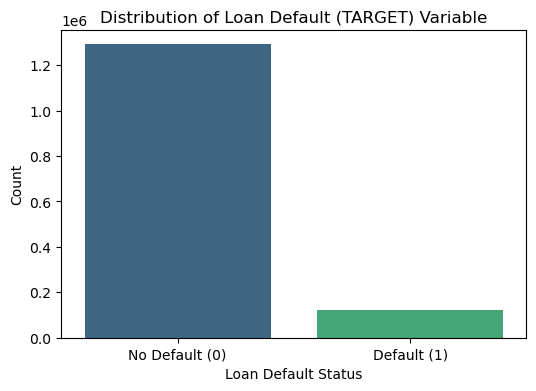

In [83]:
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')
plt.xticks([0, 1], ['No Default (0)', 'Default (1)'])
plt.xlabel("Loan Default Status")
plt.ylabel("Count")
plt.title("Distribution of Loan Default (TARGET) Variable")
plt.show()

# PRINT THE PERCENTAGE OF EACH CLASS

In [84]:
default_ratio = target_counts / len(data) * 100
print(f"Class Distribution:\n{target_counts}\n")
print(f"Percentage Distribution:\n{default_ratio.round(2)}%")

Class Distribution:
TARGET
0    1291341
1     122360
Name: count, dtype: int64

Percentage Distribution:
TARGET
0    91.34
1     8.66
Name: count, dtype: float64%


# DISPLAYING THE SHAPE OF THE TRAIN AND TEST SETS

In [85]:
print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")
print(f"Training Target: {y_train.shape}, Testing Target: {y_test.shape}")

Training Set: (1130960, 103), Testing Set: (282741, 103)
Training Target: (1130960,), Testing Target: (282741,)


# FILL MISSING VALUES

In [86]:
num_cols = X_train.select_dtypes(include=['number']).columns
cat_cols = X_train.select_dtypes(exclude=['number']).columns

print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)

Numerical Columns: Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x',
       'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START_x',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FL

In [87]:
X_train[num_cols] = X_train[num_cols].fillna(X_train[num_cols].median())
X_test[num_cols] = X_test[num_cols].fillna(X_test[num_cols].median())

In [88]:
X_train[cat_cols] = X_train[cat_cols].fillna(X_train[cat_cols].mode().iloc[0])
X_test[cat_cols] = X_test[cat_cols].fillna(X_test[cat_cols].mode().iloc[0])

In [89]:
print("Missing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in X_test:", X_test.isnull().sum().sum())

Missing values in X_train: 0
Missing values in X_test: 0


# CORRELATION ANALYSIS

# SELECT ONLY NUMERICAL COLUMNS

In [90]:
numeric_data = data.select_dtypes(include=['number'])

In [91]:
numeric_data.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,NaN,-606,500,24.0,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,NaN,-746,-1,12.0,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,NaN,-828,1400,6.0,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,NaN,-2341,200,12.0,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,NaN,-815,30,4.0,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [92]:
corr_matrix = numeric_data.corr()

In [94]:
corr_matrix.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
SK_ID_CURR,1.000000,-0.001246,-0.003099,-0.000039,-0.001194,-0.001820,-0.000648,0.000193,-0.002231,0.000872,...,-0.017274,-0.000410,0.001370,-0.000318,-0.001871,-0.001004,0.000399,-0.000288,-0.000161,0.001295
TARGET,-0.001246,1.000000,0.020313,-0.002152,-0.023622,-0.007411,-0.032568,-0.035028,0.074866,-0.047804,...,0.028640,0.039901,-0.002539,0.030480,-0.031154,-0.006651,0.018021,0.017522,0.016981,0.000653
CNT_CHILDREN,-0.003099,0.020313,1.000000,0.011661,0.002784,0.029303,-0.001029,-0.022203,0.363034,-0.247960,...,0.000519,-0.012805,0.000773,-0.055155,-0.001950,0.005048,0.000711,-0.011007,-0.009546,-0.055692
AMT_INCOME_TOTAL,-0.000039,-0.002152,0.011661,1.000000,0.166257,0.206290,0.167663,0.076722,0.025717,-0.067488,...,0.012392,0.003942,0.001644,0.021204,-0.008771,-0.000399,0.007279,0.001319,0.001460,0.001486
AMT_CREDIT_x,-0.001194,-0.023622,0.002784,0.166257,1.000000,0.758441,0.986310,0.085543,-0.047639,-0.061188,...,-0.085981,-0.060109,0.003461,0.037726,-0.007420,0.001718,0.010510,-0.061130,-0.053370,-0.016088


# CORRELATION MATRIX

In [95]:
key_features = [
    "TARGET", "AMT_INCOME_TOTAL", "AMT_CREDIT_x", "AMT_ANNUITY_x",
    "AMT_GOODS_PRICE_x", "DAYS_BIRTH", "DAYS_EMPLOYED",
    "EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"
]

In [96]:
selected_data = data[key_features]

In [97]:
corr_matrix = selected_data.corr()

In [98]:
corr_matrix.head()

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
TARGET,1.000000,-0.002152,-0.023622,-0.007411,-0.032568,0.074866,-0.047804,-0.153307,-0.155026,-0.188187
AMT_INCOME_TOTAL,-0.002152,1.000000,0.166257,0.206290,0.167663,0.025717,-0.067488,0.026166,0.064801,-0.039021
AMT_CREDIT_x,-0.023622,0.166257,1.000000,0.758441,0.986310,-0.047639,-0.061188,0.161712,0.116137,0.040969
AMT_ANNUITY_x,-0.007411,0.206290,0.758441,1.000000,0.762251,0.029009,-0.109437,0.102148,0.107940,0.015335
AMT_GOODS_PRICE_x,-0.032568,0.167663,0.986310,0.762251,1.000000,-0.045894,-0.058742,0.167731,0.123450,0.045020


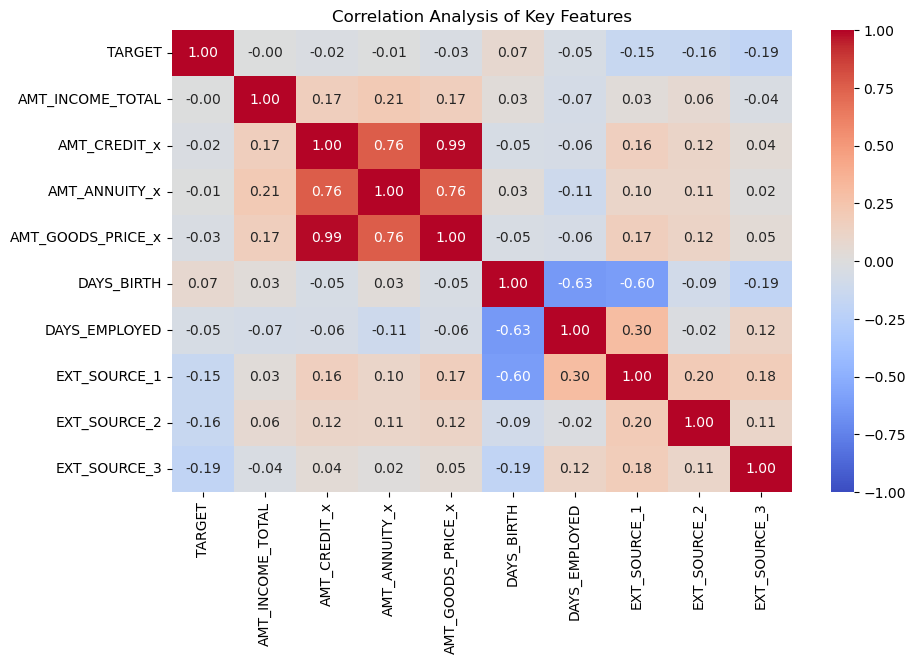

In [99]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Analysis of Key Features")
plt.show()

In [100]:
print("Correlation with TARGET:")
print(corr_matrix["TARGET"].sort_values(ascending=False))

Correlation with TARGET:
TARGET               1.000000
DAYS_BIRTH           0.074866
AMT_INCOME_TOTAL    -0.002152
AMT_ANNUITY_x       -0.007411
AMT_CREDIT_x        -0.023622
AMT_GOODS_PRICE_x   -0.032568
DAYS_EMPLOYED       -0.047804
EXT_SOURCE_1        -0.153307
EXT_SOURCE_2        -0.155026
EXT_SOURCE_3        -0.188187
Name: TARGET, dtype: float64


# FEATURE ENGINEERING

# HANDLING SKEWED DATA

In [101]:
skewed_features = ['AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x']
for feature in skewed_features:
    data[feature] = np.log1p(data[feature])

# REMOVING HIGHLY CORRELATED FEATURES

In [102]:
numeric_data = data.select_dtypes(include=['number'])

In [103]:
corr_matrix = numeric_data.corr()

In [104]:
high_corr_features = set()
threshold = 0.9

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            col_name = corr_matrix.columns[i]
            high_corr_features.add(col_name)

In [105]:
data.drop(columns=high_corr_features, inplace=True)

In [106]:
print(f"Removed {len(high_corr_features)} highly correlated features.")
print(f"New dataset shape: {data.shape}")

Removed 38 highly correlated features.
New dataset shape: (1413701, 120)


# ENCODING CATEGORICAL VARIABLE

# IDENTIFY CATEGORICAL COLUMNS

In [107]:
categorical_cols = data.select_dtypes(include=['object']).columns

In [108]:
categorical_cols

Index(['NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START_x', 'ORGANIZATION_TYPE',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE',
       'EMERGENCYSTATE_MODE', 'NAME_CONTRACT_TYPE_y',
       'WEEKDAY_APPR_PROCESS_START_y', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE_y', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION'],
      dtype='object')

# APPLY ONE-HOT ENCODING TO CATEGORICAL VARIABLES

In [109]:
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [111]:
data_encoded.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest
0,100002,1,0,12.218500,12.915581,10.114619,0.018801,-9461,-637,-3648.0,...,False,False,False,False,False,False,False,False,True,False
1,100003,0,0,12.506181,14.072865,10.482892,0.003541,-16765,-1188,-1186.0,...,True,False,False,False,False,False,False,False,False,False
2,100003,0,0,12.506181,14.072865,10.482892,0.003541,-16765,-1188,-1186.0,...,False,False,False,False,True,False,False,False,False,False
3,100003,0,0,12.506181,14.072865,10.482892,0.003541,-16765,-1188,-1186.0,...,False,False,True,False,False,False,False,False,False,False
4,100004,0,0,11.119898,11.813037,8.817446,0.010032,-19046,-225,-4260.0,...,False,False,False,False,False,False,False,True,False,False


In [112]:
data_encoded.info(), data_encoded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Columns: 336 entries, SK_ID_CURR to PRODUCT_COMBINATION_POS others without interest
dtypes: bool(248), float64(44), int64(44)
memory usage: 1.3 GB


(None,
    SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
 0      100002       1             0         12.218500     12.915581   
 1      100003       0             0         12.506181     14.072865   
 2      100003       0             0         12.506181     14.072865   
 3      100003       0             0         12.506181     14.072865   
 4      100004       0             0         11.119898     11.813037   
 
    AMT_ANNUITY_x  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
 0      10.114619                    0.018801       -9461           -637   
 1      10.482892                    0.003541      -16765          -1188   
 2      10.482892                    0.003541      -16765          -1188   
 3      10.482892                    0.003541      -16765          -1188   
 4       8.817446                    0.010032      -19046           -225   
 
    DAYS_REGISTRATION  ...  PRODUCT_COMBINATION_Cash X-Sell: low  \
 0            -3648.0  ...       

In [113]:
print("Available columns in X_train:\n", X_train.columns.tolist())
print("\nMissing categorical columns:\n", [col for col in categorical_cols if col not in X_train.columns])

Available columns in X_train:
 ['SK_ID_CURR', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_x', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIR

In [114]:
valid_categorical_cols = [col for col in categorical_cols if col in X_train.columns]

X_train = pd.get_dummies(X_train, columns=valid_categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=valid_categorical_cols, drop_first=True)

In [115]:
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [116]:
print(X_train.head())

        SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
810291      304854             0          270000.0      539100.0   
228892      157782             0          270000.0     1006920.0   
30773       107805             2          180000.0      526500.0   
127694      132364             1          157500.0     1216201.5   
253459      164101             0          135000.0      269550.0   

        AMT_ANNUITY_x  AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE  \
810291        22968.0           450000.0                    0.072508   
228892        42660.0           900000.0                    0.031329   
30773         25456.5           526500.0                    0.028663   
127694        35689.5          1062000.0                    0.010966   
253459        19300.5           225000.0                    0.006305   

        DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  ...  \
810291      -15618          -1504            -9725.0  ...   
228892       -9508          -1122   

In [117]:
print(X_test.head())

         SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
159177       140179             0          135000.0      684000.0   
770782       295118             0          225000.0      408865.5   
1074777      371368             0           92700.0      310671.0   
287666       172834             0          180000.0      855882.0   
824033       308344             3          180000.0      808650.0   

         AMT_ANNUITY_x  AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE  \
159177         35055.0           684000.0                    0.028663   
770782         18139.5           310500.0                    0.009657   
1074777        10053.0           256500.0                    0.010556   
287666         36261.0           765000.0                    0.008068   
824033         23175.0           675000.0                    0.022625   

         DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  ...  \
159177       -17922           -515            -2401.0  ...   
770782       -23347   

# HANDLE CLASS IMBALANCE USING SMOTE

# USE SMOTE ON A SUBSET

In [118]:
sample_size = 100000 
X_sampled = X_train.sample(n=sample_size, random_state=42)
y_sampled = y_train.loc[X_sampled.index]

In [119]:
X_sampled.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest
1130103,384114,1,157500.0,306000.0,11785.5,306000.0,0.026392,-13057,-502,-6494.0,...,False,False,False,True,False,False,False,False,False,False
537598,236076,3,270000.0,970380.0,31302.0,810000.0,0.007114,-14107,-5573,-1346.0,...,False,False,False,True,False,False,False,False,False,False
1240055,413900,2,225000.0,1666746.0,45963.0,1305000.0,0.019689,-16023,-3299,-6824.0,...,False,False,False,True,False,False,False,False,False,False
298085,175419,0,225000.0,1205896.5,35388.0,1053000.0,0.010147,-20411,365243,-1427.0,...,True,False,False,False,False,False,False,False,False,False
602636,252619,0,202500.0,284400.0,10345.5,225000.0,0.019101,-21247,365243,-3644.0,...,False,False,True,False,False,False,False,False,False,False


In [120]:
y_sampled.head()

1130103    0
537598     1
1240055    0
298085     1
602636     0
Name: TARGET, dtype: int64

In [121]:
smote = SMOTE(random_state=42)

In [126]:
smote

SMOTE(random_state=42)

In [123]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_sampled, y_sampled)

In [124]:
X_train_resampled.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest
0,384114,1,157500.0,306000.0,11785.5,306000.0,0.026392,-13057,-502,-6494.0,...,False,False,False,True,False,False,False,False,False,False
1,236076,3,270000.0,970380.0,31302.0,810000.0,0.007114,-14107,-5573,-1346.0,...,False,False,False,True,False,False,False,False,False,False
2,413900,2,225000.0,1666746.0,45963.0,1305000.0,0.019689,-16023,-3299,-6824.0,...,False,False,False,True,False,False,False,False,False,False
3,175419,0,225000.0,1205896.5,35388.0,1053000.0,0.010147,-20411,365243,-1427.0,...,True,False,False,False,False,False,False,False,False,False
4,252619,0,202500.0,284400.0,10345.5,225000.0,0.019101,-21247,365243,-3644.0,...,False,False,True,False,False,False,False,False,False,False


In [127]:
y_train_resampled

0         0
1         1
2         0
3         1
4         0
         ..
182369    1
182370    1
182371    1
182372    1
182373    1
Name: TARGET, Length: 182374, dtype: int64

# CHECK CLASS DISTRIBUTION AFTER SMOTE

In [128]:
print("Class distribution after SMOTE:", np.bincount(y_train_resampled))

Class distribution after SMOTE: [91187 91187]


# FEATURE SCALING (STANDARDIZATION)

In [129]:
scaler = StandardScaler()

In [133]:
scaler

StandardScaler()

In [131]:
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)

In [132]:
X_train_resampled_scaled

array([[ 1.06710964,  1.09844686, -0.13803972, ..., -0.1427276 ,
        -0.13766491, -0.04658949],
       [-0.41644097,  4.30462059,  1.12508651, ..., -0.1427276 ,
        -0.13766491, -0.04658949],
       [ 1.36560759,  2.70153372,  0.61983601, ..., -0.1427276 ,
        -0.13766491, -0.04658949],
       ...,
       [ 1.1708714 , -0.50464001, -0.8476924 , ..., -0.1427276 ,
        -0.13766491, -0.04658949],
       [-0.17623761, -0.50464001, -0.08518935, ..., -0.1427276 ,
        -0.13766491, -0.04658949],
       [ 0.04884343, -0.50464001, -0.57047261, ..., -0.1427276 ,
        -0.13766491, -0.04658949]])

In [134]:
X_test_scaled = scaler.transform(X_test)

In [135]:
X_test_scaled

array([[-1.37746484, -0.50464001, -0.39066497, ..., -0.1427276 ,
        -0.13766491, -0.04658949],
       [ 0.17524357, -0.50464001,  0.61983601, ..., -0.1427276 ,
        -0.13766491, -0.04658949],
       [ 0.93937665, -0.50464001, -0.86560043, ..., -0.1427276 ,
        -0.13766491, -0.04658949],
       ...,
       [ 0.75999328, -0.50464001,  0.87246126, ..., -0.1427276 ,
        -0.13766491, -0.04658949],
       [-0.32371279,  2.70153372, -0.64329021, ..., -0.1427276 ,
        -0.13766491, -0.04658949],
       [-1.32640572, -0.50464001, -0.92951462, ..., -0.1427276 ,
        -0.13766491, -0.04658949]])

# MODEL SELECTION - TRAINING AND EVALUATION

# LOGISTIC REGRESSION MODEL

# HYPERPARAMETER TUNING

In [136]:
param_grid = [
    {'solver': 'lbfgs', 'penalty': 'l2', 'C': 10},
    {'solver': 'saga', 'penalty': 'l2', 'C': 1}
]

In [137]:
best_auc = 0
best_params = None
best_model = None

for params in param_grid:
    print(f" Testing: {params}")
    
    log_reg = LogisticRegression(**params, max_iter=500, random_state=42)

 Testing: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}
 Testing: {'solver': 'saga', 'penalty': 'l2', 'C': 1}


In [143]:
log_reg

LogisticRegression(C=1, max_iter=500, random_state=42, solver='saga')

#  TRAIN THE MODEL

In [139]:
log_reg.fit(X_train_resampled_scaled, y_train_resampled)

LogisticRegression(C=1, max_iter=500, random_state=42, solver='saga')

#  MAKE PREDICTIONS

# PREDICTIONS ON TRAINING & TEST DATA

In [140]:
y_train_pred = log_reg.predict(X_train_resampled_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

In [141]:
y_train_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [142]:
y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# PROBABILITIES FOR ROC-AUC

In [145]:
y_train_proba = log_reg.predict_proba(X_train_resampled_scaled)[:, 1]
y_test_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

In [146]:
y_train_proba

array([0.08668366, 0.07782965, 0.01624521, ..., 0.99915695, 0.99999642,
       0.99993134])

In [147]:
y_test_proba

array([0.26541835, 0.06813035, 0.02518109, ..., 0.3743375 , 0.11098739,
       0.17668367])

# EVALAUTE THE MODEL

# ACCURACY

In [148]:
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [149]:
train_accuracy

0.9480847050566419

In [150]:
test_accuracy

0.9122801433113698

# CLASSIFICATION REPORT

In [151]:
print(" Classification Report (Test Data):\n", classification_report(y_test, y_test_pred))

 Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.92      1.00      0.95    258269
           1       0.41      0.03      0.06     24472

    accuracy                           0.91    282741
   macro avg       0.66      0.51      0.51    282741
weighted avg       0.87      0.91      0.88    282741



#  ROC-AUC SCORE

In [152]:
train_roc_auc = roc_auc_score(y_train_resampled, y_train_proba)
test_roc_auc = roc_auc_score(y_test, y_test_proba)
print(f" Final ROC-AUC Score (Test): {test_roc_auc:.4f}")

 Final ROC-AUC Score (Test): 0.7134


In [153]:
train_roc_auc

0.9723618310495339

In [154]:
test_roc_auc

0.7134034800600585

In [155]:
print(f" Training Accuracy: {train_accuracy:.4f}")
print(f" Test Accuracy: {test_accuracy:.4f}")
print(f" ROC-AUC Score (Train): {train_roc_auc:.4f}")
print(f" ROC-AUC Score (Test): {test_roc_auc:.4f}")

 Training Accuracy: 0.9481
 Test Accuracy: 0.9123
 ROC-AUC Score (Train): 0.9724
 ROC-AUC Score (Test): 0.7134


# COMPUTE ROC CURVE

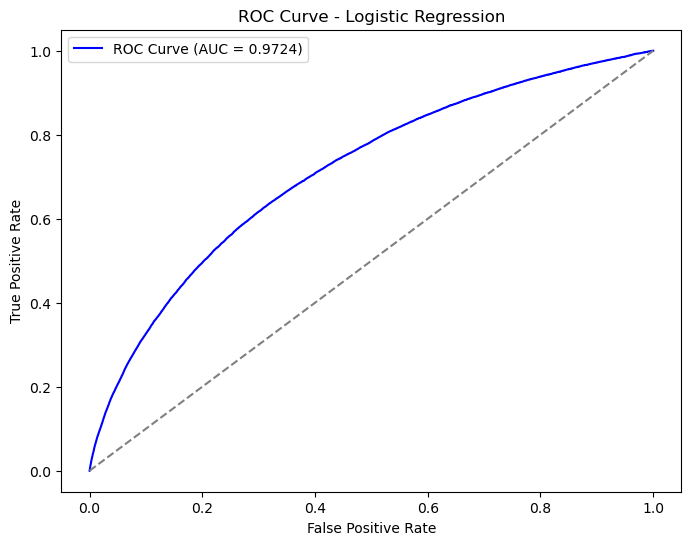

In [157]:
fpr, tpr, _ = roc_curve(y_test, y_test_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {train_roc_auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray') 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

# RANDOM FOREST CLASSIFIER

In [158]:
# HYPERPARAMETER TUNING

In [159]:
param_grid = [
    {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 5},
    {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 10},
    {'n_estimators': 300, 'max_depth': 20, 'min_samples_split': 15},
]

In [160]:
best_auc = 0
best_params = None
best_model = None

for params in param_grid:
    print(f" Testing: {params}")
    
    rf_model = RandomForestClassifier(**params, random_state=42, n_jobs=-1)

 Testing: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 5}
 Testing: {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 10}
 Testing: {'n_estimators': 300, 'max_depth': 20, 'min_samples_split': 15}


In [166]:
rf_model

RandomForestClassifier(max_depth=20, min_samples_split=15, n_estimators=300,
                       n_jobs=-1, random_state=42)

In [162]:
# TRAIN THE MODEL

In [163]:
rf_model.fit(X_train_resampled_scaled, y_train_resampled)

RandomForestClassifier(max_depth=20, min_samples_split=15, n_estimators=300,
                       n_jobs=-1, random_state=42)

In [164]:
# MAKE PREDICTIONS

In [165]:
# PREDICTIONS ON TRAINING & TEST DATA

In [167]:
y_train_pred_rf = rf_model.predict(X_train_resampled_scaled)
y_test_pred_rf = rf_model.predict(X_test_scaled)

In [168]:
y_train_pred_rf

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [169]:
y_test_pred_rf 

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [170]:
# PROBABILITIES FOR ROC-AUC

In [171]:
y_train_proba_rf = rf_model.predict_proba(X_train_resampled_scaled)[:, 1]
y_test_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

In [172]:
y_train_proba_rf

array([0.09065908, 0.58016799, 0.090446  , ..., 0.85470243, 0.89559374,
       0.93949223])

In [173]:
y_test_proba_rf

array([0.51974431, 0.1325653 , 0.07138631, ..., 0.24448788, 0.19667871,
       0.26637676])

In [174]:
# EVALAUTE THE MODEL

In [176]:
# ACCURACY

In [177]:
train_accuracy_rf = accuracy_score(y_train_resampled, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

In [178]:
train_accuracy_rf

0.9637064493842324

In [179]:
test_accuracy_rf

0.9084356354402086

In [180]:
# CLASSIFICATION REPORT

In [181]:
print(" Classification Report (Test Data):\n", classification_report(y_test, y_test_pred_rf))

 Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.92      0.99      0.95    258269
           1       0.37      0.08      0.13     24472

    accuracy                           0.91    282741
   macro avg       0.64      0.53      0.54    282741
weighted avg       0.87      0.91      0.88    282741



In [182]:
# ROC-AUC SCORE

In [183]:
train_roc_auc_rf = roc_auc_score(y_train_resampled, y_train_proba_rf)
test_roc_auc_rf = roc_auc_score(y_test, y_test_proba_rf)

In [184]:
train_roc_auc_rf

0.9979409195445242

In [185]:
test_roc_auc_rf

0.7220245555837549

In [186]:
print(f" Training Accuracy: {train_accuracy_rf:.4f}")
print(f" Test Accuracy: {test_accuracy_rf:.4f}")
print(f" ROC-AUC Score (Train): {train_roc_auc_rf:.4f}")
print(f" ROC-AUC Score (Test): {test_roc_auc_rf:.4f}")

 Training Accuracy: 0.9637
 Test Accuracy: 0.9084
 ROC-AUC Score (Train): 0.9979
 ROC-AUC Score (Test): 0.7220


In [187]:
# COMPUTE ROC CURVE

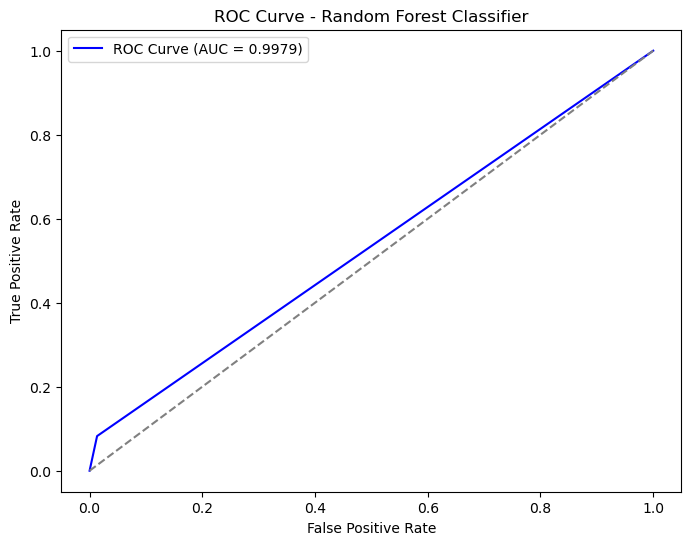

In [189]:
fpr, tpr, _ = roc_curve(y_test, y_test_pred_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {train_roc_auc_rf:.4f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray') 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest Classifier")
plt.legend()
plt.show()

#  XGBOOST CLASSIFER

In [190]:
param_grid = [
    {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'subsample': 0.8},
    {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05, 'subsample': 0.9},
    {'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.01, 'subsample': 1.0},
]

In [191]:
best_auc = 0
best_params = None
best_model = None

for params in param_grid:
    print(f" Testing: {params}")
    
    xgb = XGBClassifier(**params, random_state=42, use_label_encoder=False, eval_metric='logloss', n_jobs=-1)

 Testing: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'subsample': 0.8}
 Testing: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05, 'subsample': 0.9}
 Testing: {'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.01, 'subsample': 1.0}


In [201]:
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=-1, num_parallel_tree=None, random_state=42, ...)

In [193]:
# TRAIN THE MODEL

In [194]:
xgb.fit(X_train_resampled_scaled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=-1, num_parallel_tree=None, random_state=42, ...)

In [195]:
#  MAKE PREDICTIONS

In [196]:
# PREDICTIONS ON TRAINING & TEST DATA

In [197]:
y_train_pred_xgb = xgb.predict(X_train_resampled_scaled)
y_test_pred_xgb= xgb.predict(X_test_scaled)

In [198]:
y_train_pred_xgb

array([0, 0, 0, ..., 1, 1, 1])

In [199]:
y_test_pred_xgb

array([1, 0, 0, ..., 0, 0, 0])

In [200]:
# PROBABILITIES FOR ROC-AUC

In [202]:
y_train_proba_xgb = xgb.predict_proba(X_train_resampled_scaled)[:, 1]
y_test_proba_xgb = xgb.predict_proba(X_test_scaled)[:, 1]

In [203]:
y_train_proba_xgb

array([0.13605508, 0.3359748 , 0.08029551, ..., 0.9171405 , 0.91991657,
       0.9536681 ], dtype=float32)

In [204]:
y_test_proba_xgb

array([0.56731164, 0.15284254, 0.0866612 , ..., 0.33343452, 0.16925791,
       0.32319045], dtype=float32)

In [205]:
# EVALAUTE THE MODEL

In [207]:
# ACCURACY

In [208]:
train_accuracy_xgb = accuracy_score(y_train_resampled, y_train_pred_xgb)
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)

In [209]:
train_accuracy_xgb

0.9414280544375843

In [210]:
test_accuracy_xgb

0.9030278594190443

In [211]:
# CLASSIFICATION REPORT

In [212]:
print(" Classification Report (Test Data):\n", classification_report(y_test, y_test_pred_xgb))

 Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.92      0.98      0.95    258269
           1       0.25      0.06      0.10     24472

    accuracy                           0.90    282741
   macro avg       0.58      0.52      0.52    282741
weighted avg       0.86      0.90      0.87    282741



In [213]:
#  ROC-AUC SCORE

In [214]:
train_roc_auc_xgb = roc_auc_score(y_train_resampled, y_train_proba_xgb)
test_roc_auc_xgb = roc_auc_score(y_test, y_test_proba_xgb)
print(f" Final ROC-AUC Score (Test): {test_roc_auc_xgb:.4f}")

 Final ROC-AUC Score (Test): 0.6956


In [215]:
train_roc_auc_xgb

0.9723661805023327

In [216]:
test_roc_auc_xgb

0.6956171437824574

In [217]:
print(f" Training Accuracy: {train_accuracy_xgb:.4f}")
print(f" Test Accuracy: {test_accuracy_xgb:.4f}")
print(f" ROC-AUC Score (Train): {train_roc_auc_xgb:.4f}")
print(f" ROC-AUC Score (Test): {test_roc_auc_xgb:.4f}")

 Training Accuracy: 0.9414
 Test Accuracy: 0.9030
 ROC-AUC Score (Train): 0.9724
 ROC-AUC Score (Test): 0.6956


In [218]:
# COMPUTE ROC CURVE

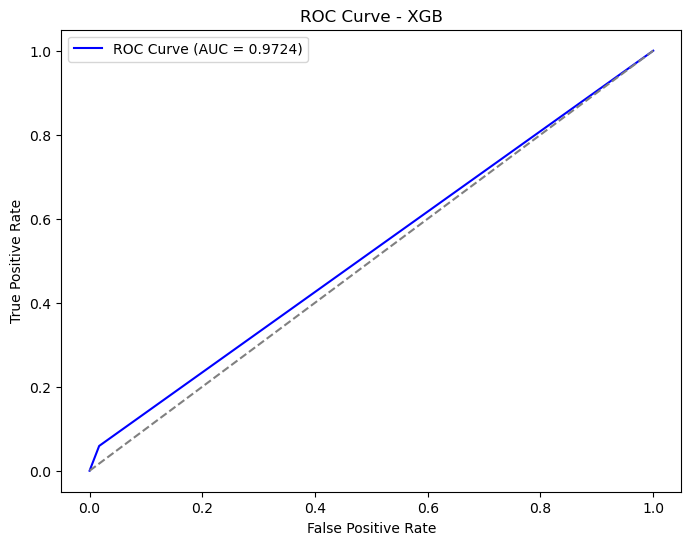

In [219]:
fpr, tpr, _ = roc_curve(y_test, y_test_pred_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {train_roc_auc_xgb:.4f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray') 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGB")
plt.legend()
plt.show()

# STOCHASTIC GRADIENT DESCENT

In [220]:
# HYPERPARAMETER TUNING

In [221]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],  
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.001, 0.01, 0.1, 1]  
}

In [222]:
sgd_search = RandomizedSearchCV(SGDClassifier(loss='hinge', random_state=42), 
                                param_grid, n_iter=10, cv=3, scoring='roc_auc', n_jobs=-1, random_state=42)

In [247]:
sgd_search

RandomizedSearchCV(cv=3, estimator=SGDClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                                        'eta0': [0.001, 0.01, 0.1, 1],
                                        'learning_rate': ['constant', 'optimal',
                                                          'invscaling',
                                                          'adaptive']},
                   random_state=42, scoring='roc_auc')

In [224]:
# TRAIN THE MODEL

In [225]:
sgd_search.fit(X_train_resampled_scaled, y_train_resampled)

RandomizedSearchCV(cv=3, estimator=SGDClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                                        'eta0': [0.001, 0.01, 0.1, 1],
                                        'learning_rate': ['constant', 'optimal',
                                                          'invscaling',
                                                          'adaptive']},
                   random_state=42, scoring='roc_auc')

In [226]:
best_sgd = sgd_search.best_estimator_

In [227]:
# MAKE PREDICTIONS

In [228]:
# PREDICTIONS ON TRAINING & TEST DATA

In [229]:
y_train_pred_sgd = best_sgd.predict(X_train_resampled_scaled)
y_test_pred_sgd = best_sgd.predict(X_test_scaled)

In [230]:
y_train_pred_sgd

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [231]:
y_test_pred_sgd

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [233]:
# EVALAUTE THE MODEL

In [234]:
# ACCURACY

In [235]:
train_accuracy_sgd = accuracy_score(y_train_resampled, y_train_pred_sgd)
test_accuracy_sgd = accuracy_score(y_test, y_test_pred_sgd)

In [236]:
train_accuracy_sgd

0.9351168477962868

In [237]:
test_accuracy_sgd 

0.9125312565209857

In [238]:
# CLASSIFICATION REPORT

In [239]:
print(" Classification Report (Test Data):\n", classification_report(y_test, y_test_pred_sgd))

 Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.91      1.00      0.95    258269
           1       0.33      0.01      0.02     24472

    accuracy                           0.91    282741
   macro avg       0.62      0.50      0.49    282741
weighted avg       0.86      0.91      0.87    282741



In [241]:
# ROC-AUC SCORE

In [242]:
train_roc_auc_sgd = accuracy_score(y_test, y_test_pred_sgd)
test_roc_auc_sgd = roc_auc_score(y_test, best_sgd.decision_function(X_test_scaled))

In [243]:
train_roc_auc_sgd

0.9125312565209857

In [244]:
test_roc_auc_sgd

0.6303116220407688

In [245]:
print(f" Training Accuracy: {train_accuracy_sgd:.4f}")
print(f" Test Accuracy: {test_accuracy_sgd:.4f}")
print(f" ROC-AUC Score (Train): {train_roc_auc_sgd:.4f}")
print(f" ROC-AUC Score (Test): {test_roc_auc_sgd:.4f}")

 Training Accuracy: 0.9351
 Test Accuracy: 0.9125
 ROC-AUC Score (Train): 0.9125
 ROC-AUC Score (Test): 0.6303


In [246]:
# COMPUTE ROC CURVE

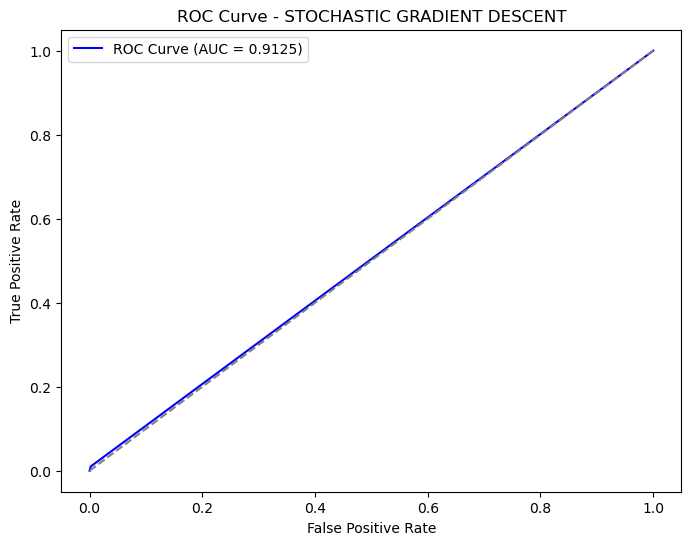

In [248]:
fpr, tpr, _ = roc_curve(y_test, y_test_pred_sgd)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {train_roc_auc_sgd:.4f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray') 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - STOCHASTIC GRADIENT DESCENT")
plt.legend()
plt.show()

# DEEP LEARNING MODEL

In [249]:
# MODEL ARCHITECTURE

In [255]:
model = Sequential()
model.add(Dense(256, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [256]:
# TRAIN THE MODEL

In [259]:
model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=256,
    validation_data=(X_test, y_test),  
    class_weight=class_weights_dict,
   # callbacks=[early_stop],
    verbose=1
)

Epoch 1/10
4418/4418 ━━━━━━━━━━━━━━━━━━━━ 76s 8ms/step - accuracy: 0.3637 - loss: 1765.1667 - val_accuracy: 0.9134 - val_loss: 0.6921
Epoch 2/10
4418/4418 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - accuracy: 0.4108 - loss: 1.0824 - val_accuracy: 0.9134 - val_loss: 0.6900
Epoch 3/10
4418/4418 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - accuracy: 0.6783 - loss: 1.0343 - val_accuracy: 0.9134 - val_loss: 0.6922
Epoch 4/10
4418/4418 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - accuracy: 0.5039 - loss: 0.7701 - val_accuracy: 0.9134 - val_loss: 0.6922
Epoch 5/10
4418/4418 ━━━━━━━━━━━━━━━━━━━━ 32s 7ms/step - accuracy: 0.6069 - loss: 0.7383 - val_accuracy: 0.0866 - val_loss: 0.6932
Epoch 6/10
4418/4418 ━━━━━━━━━━━━━━━━━━━━ 34s 8ms/step - accuracy: 0.5615 - loss: 0.7111 - val_accuracy: 0.0866 - val_loss: 0.6974
Epoch 7/10
4418/4418 ━━━━━━━━━━━━━━━━━━━━ 34s 8ms/step - accuracy: 0.3810 - loss: 1.3070 - val_accuracy: 0.9134 - val_loss: 0.6900
Epoch 8/10
4418/4418 ━━━━━━━━━━━━━━━━━━━━ 33s 8ms/step - accuracy: 0.5981 - loss

In [260]:
# EVALUATE THE MODEL

In [261]:
y_test_pred_proba = model.predict(X_test)

y_test_pred = (y_test_pred_proba > 0.5).astype(int)

print("Classification Report:")
print(classification_report(y_test, y_test_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_test_pred_proba))

8836/8836 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95    258269
           1       0.00      0.00      0.00     24472

    accuracy                           0.91    282741
   macro avg       0.46      0.50      0.48    282741
weighted avg       0.83      0.91      0.87    282741

Confusion Matrix:
[[258269      0]
 [ 24472      0]]
ROC AUC Score: 0.5


# SAVE THE MODEL

In [263]:
model.save("keras_model.h5")
print(" Keras model saved as keras_model.h5")

 Keras model saved as keras_model.h5


# GEN-AI RISK SCORE

In [264]:
def get_derived_risk_score(age, income, employment_status, credit_score):
    age_weight = max(0, min(1, (70 - age) / 70))  
    income_weight = max(0, min(1, income / 200000))  
    credit_weight = max(0, min(1, credit_score / 850))  

    emp_factor = {
        "Full-time": 0.1,
        "Part-time": 0.3,
        "Self-employed": 0.2,
        "Unemployed": 0.5,
        "Student": 0.4
    }
    employment_weight = 1 - emp_factor.get(employment_status, 0.3)

    risk_score = 1 - (0.3 * income_weight + 0.3 * credit_weight + 0.2 * age_weight + 0.2 * employment_weight)
    return round(risk_score, 2)
age = 45
income = 85000
employment_status = "Full-time"
credit_score = 710

score = get_derived_risk_score(age, income, employment_status, credit_score)
print(f"Derived Risk Score: {score}")

Derived Risk Score: 0.37
